In [2]:
import numpy as np
import matplotlib.pyplot as pl
from astropy.io.votable import parse



In [54]:
NGC_white = np.loadtxt('NGC_white.txt').T
NGC_vot = parse('NGC2516.vot')
table = NGC_vot.get_first_table()

In [55]:
table_w

<Table length=4>
 SBL    RAJ2000     DEJ2000     Vmag    V-Ic    B-V     U-B     Prob  SpType
                                mag     mag     mag     mag                 
int16    str11       str11    float32 float32 float32 float32 float32  str8 
----- ----------- ----------- ------- ------- ------- ------- ------- ------
 4142 07 57 03.11 -60 54 53.0  19.344      --  -0.010  -1.214      --       
 5205 07 57 50.64 -60 49 54.4  18.914      --  -0.106  -1.123      --       
 5262 07 57 53.74 -60 28 49.6  19.286  -0.080  -0.156  -0.989      --       
 6445 07 58 49.17 -60 48 23.3  19.188      --  -0.093  -1.259      --       

In [126]:
table_arr = table.array
BV = []
V=[]
BV_all =[]
V_all=[]
for i in range(len(table_arr)):
    if table_arr[i][7] >= 0.6:
        BV.append(table_arr[i][5])
        V.append(table_arr[i][3])
for i in range(len(table_arr)):
    BV_all.append(table_arr[i][5])
    V_all.append(table_arr[i][3])
BV = np.array(BV)
V=np.array(V)
BV_all = np.array(BV_all)
V_all=np.array(V_all)
    

<ipython-input-126-69c14ee8a673>:15: UserWarning: Warning: converting a masked element to nan.
  BV_all = np.array(BV_all)


In [127]:
V_w = NGC_white[1]
BV_w = NGC_white[2]


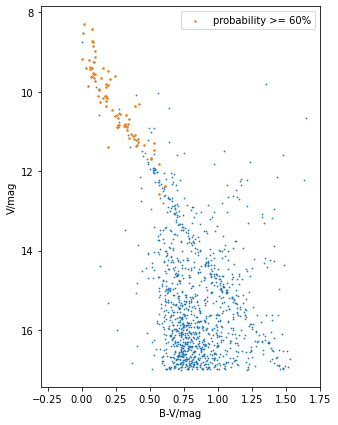

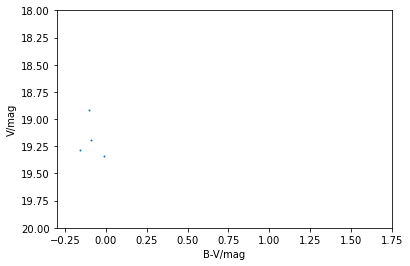

In [140]:
fig = pl.figure()
fig.set_figheight(7)
fig.set_figwidth(5)
pl.scatter(BV_all, V_all, s= 0.5)
pl.scatter(BV ,V , s =2, label='probability >= 60%')
pl.xlabel('B-V/mag')
pl.ylabel('V/mag')
#pl.scatter(BV_w, V_w, s= 1)

pl.gca().invert_yaxis()
pl.legend()
pl.xlim(-0.3,1.75)
pl.savefig('ccd_2516.jpeg')
pl.show()
fig1 = pl.figure()
pl.scatter(BV_w, V_w, s= 1)
pl.gca().invert_yaxis()
pl.xlim(-0.3,1.75)
pl.xlabel('B-V/mag')
pl.ylabel('V/mag')
pl.ylim(20,18)
pl.savefig('ccd_w.jpeg')
pl.show()



In [132]:
'''isochrones'''
age1 = np.loadtxt('FEHm010/100z0125800y264P00O1D1E1.isc_john').T
age2 = np.loadtxt('FEHm010/150z0125800y264P00O1D1E1.isc_john').T
age3 = np.loadtxt('FEHm010/200z0125800y264P00O1D1E1.isc_john').T
age4 = np.loadtxt('FEHm010/250z0125800y264P00O1D1E1.isc_john').T
age5 = np.loadtxt('FEHm010/300z0125800y264P00O1D1E1.isc_john').T

age1

age1.shape


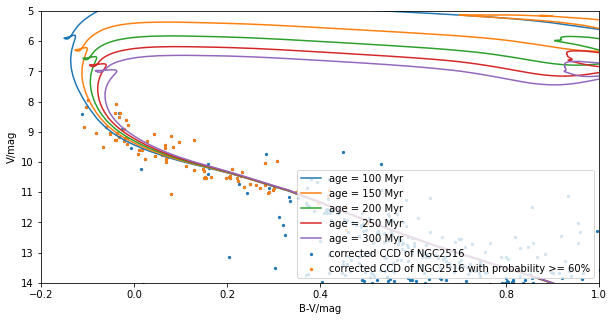

In [177]:
for i in range(1,6):
    globals()['B{}'.format(i)] = globals()['age{}'.format(i)][6]
    globals()['V{}'.format(i)] = globals()['age{}'.format(i)][7]
    globals()['BV{}'.format(i)] = globals()['B{}'.format(i)]-globals()['V{}'.format(i)]
fig3 = pl.figure()
fig3.set_figheight(5)
fig3.set_figwidth(10)
for i in range(1,6):
    age= 100+50*(i-1)
    pl.plot(globals()['BV{}'.format(i)], globals()['V{}'.format(i)]+7.77, label = 'age = '+str(age)+' Myr')
pl.xlabel('B-V/mag')
pl.ylabel('V/mag')
#pl.scatter(BV_w, V_w, s= 1)
pl.scatter(BV_all-EBV ,V_all-EBV*3.1 , s =5, label='corrected CCD of NGC2516')
pl.scatter(BV-EBV ,V-EBV*3.1 , s =5, label='corrected CCD of NGC2516 with probability >= 60%')

pl.gca().invert_yaxis()
pl.legend(loc = 'lower right')
pl.ylim(14,5)
pl.xlim(-0.2,1)
pl.xticks([-0.2,0.0,0.2,0.4,0.8,1.0])
pl.savefig('ccd_isc.jpeg')
pl.show()


In [85]:
age1.shape


(2100, 16)

(-0.2, 1.0)

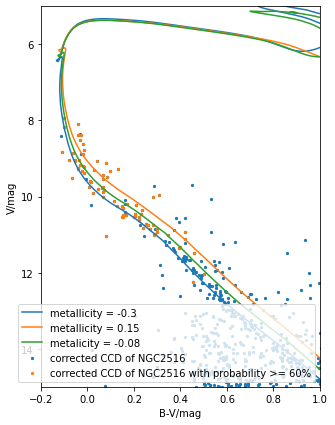

In [155]:
me030 = np.loadtxt('me030.isc_john').T # age 150 Myrs and metalicity = -0.30
me015 = np.loadtxt('me015.isc_john').T # age 150 Myrs and metalicity = 0.15
fig4 = pl.figure()
fig4.set_figheight(7)
fig4.set_figwidth(5)

pl.plot(me030[6]-me030[7],me030[7]+7.77, label ='metallicity = -0.3')
pl.plot(me015[6]-me015[7],me015[7]+7.77, label ='metallicity = 0.15')
pl.plot(BV2, V2+7.77, label = 'metalicity = -0.08')
pl.xlabel('B-V/mag')
pl.ylabel('V/mag')
pl.xlim(-0.2,1.0)
#pl.scatter(BV_w, V_w, s= 1)
pl.scatter(BV_all-EBV ,V_all-EBV*3.1 , s =5, label='corrected CCD of NGC2516')
pl.scatter(BV-EBV ,V-EBV*3.1 , s =5, label='corrected CCD of NGC2516 with probability >= 60%')

pl.gca().invert_yaxis()
pl.legend()
pl.ylim(15,5)
pl.savefig('ccd_isc_me.jpeg')
pl.xlim(-0.2,1.0)